In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
data['Age Range'].value_counts()

2    127
1    110
Name: Age Range, dtype: int64

In [4]:
data.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [6]:
data.shape

(237, 4)

In [7]:
data.isna().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

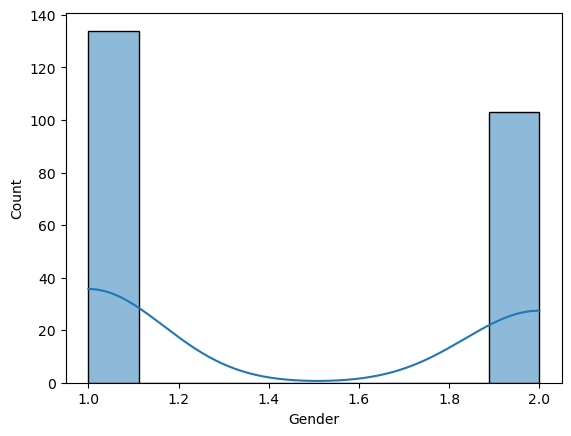

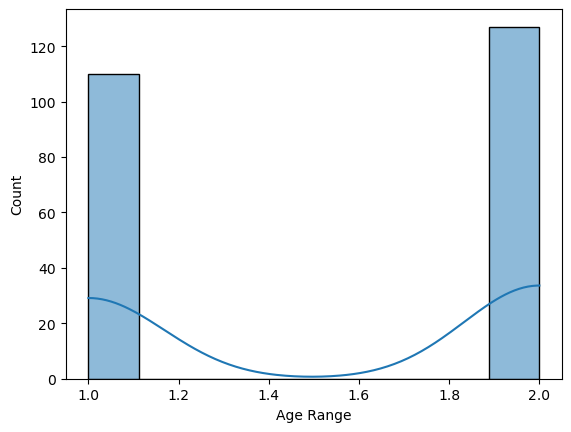

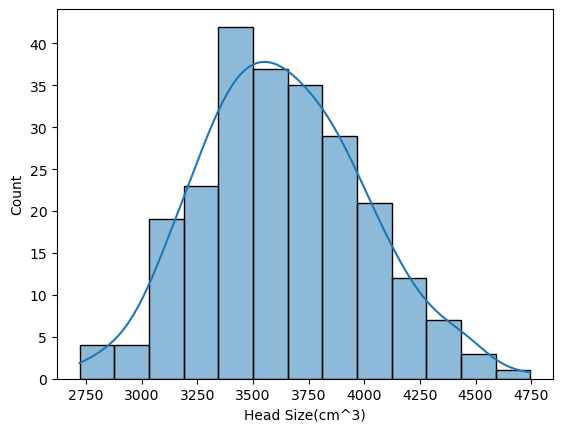

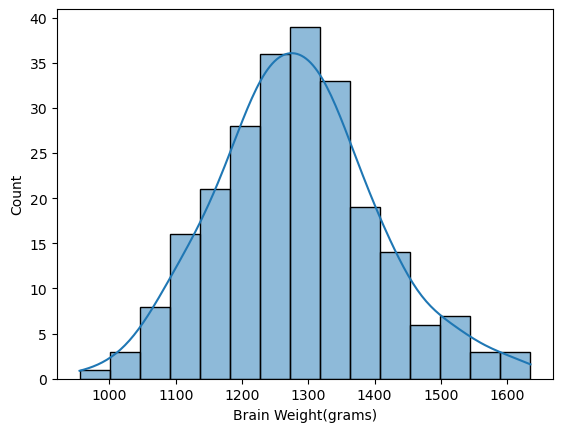

In [8]:
for i in data.columns:
    sns.histplot(x=data[i], kde=True)
    plt.show()

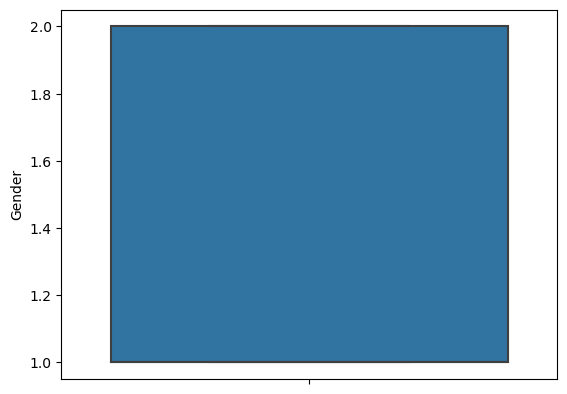

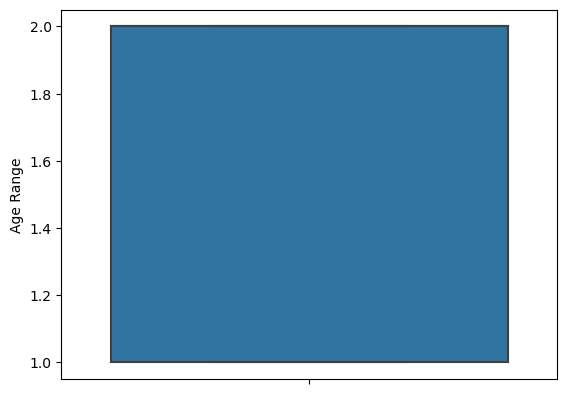

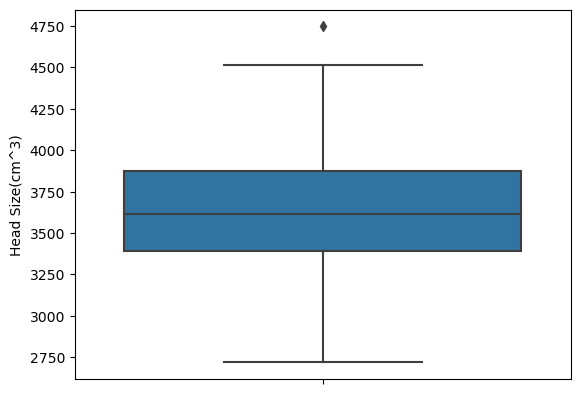

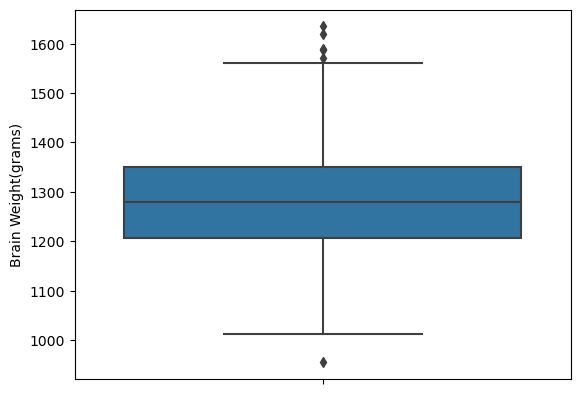

In [9]:
for i in data.columns:
    if data[i].dtypes!='object':
        sns.boxplot(y=data[i])
        plt.show()

In [10]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [11]:
cl=['Head Size(cm^3)','Brain Weight(grams)']

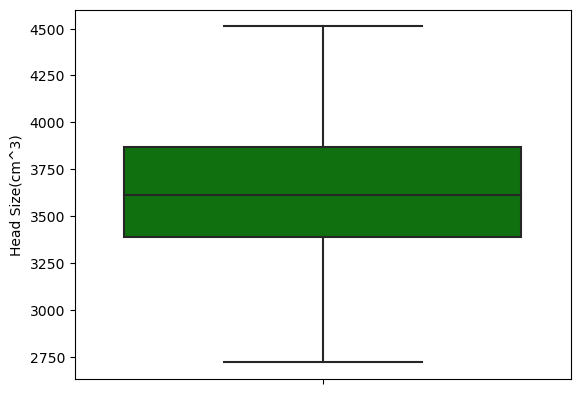

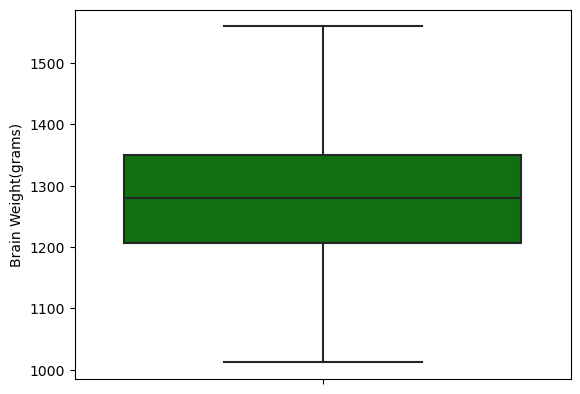

In [12]:
for i in cl:
    UL,LL=outlier_limit(data[i])
    data[i]=np.where((data[i]>UL)|(data[i]<LL),np.nan,data[i])
    sns.boxplot(y=data[i], color='green')
    plt.show()

#### Checking the NaN values

In [13]:
data.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        1
Brain Weight(grams)    6
dtype: int64

In [14]:
data.dropna(inplace=True)

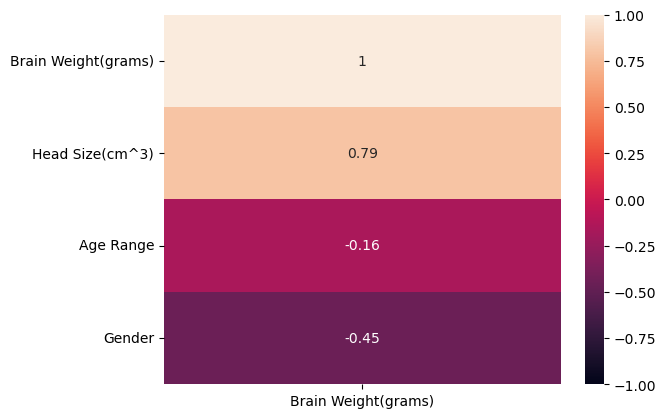

In [15]:
sns.heatmap(data.corr()[['Brain Weight(grams)']].sort_values(by='Brain Weight(grams)',ascending=False),vmin=-1,vmax=1,annot=True)
plt.show()

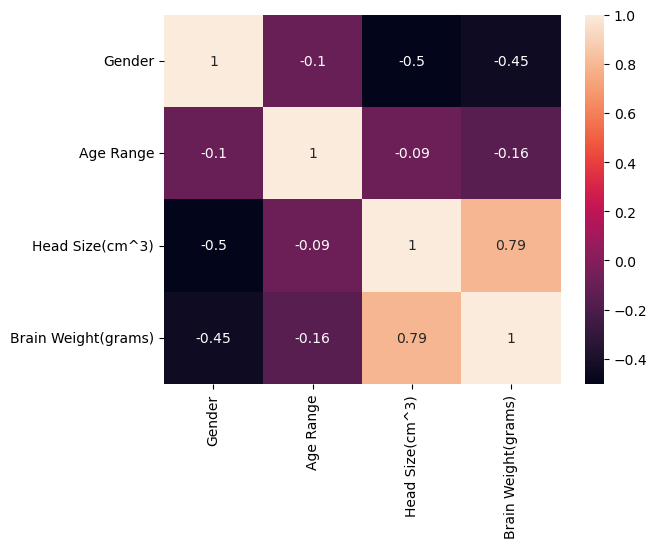

In [16]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [17]:
x=data.iloc[:,-2].values
y=data.iloc[:,-1].values

In [18]:
sc=StandardScaler()

In [19]:
x=sc.fit_transform(x.reshape(-1,1))

In [20]:
x.shape

(231, 1)

In [21]:
y.shape

(231,)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [23]:
models={'linearregression':LinearRegression(),
        'Lasso':Lasso(),
       'Ridge':Ridge(),
       'Adaboostregressor':AdaBoostRegressor(),
       'GradeintBoostingregressor':GradientBoostingRegressor(),
       'Randomforest':RandomForestRegressor(random_state=0),
       'Decisiontreeregressor':DecisionTreeRegressor(),
       'SVM':LinearSVR()}

In [24]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("models trained with {}".format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score = model.score(x_test, y_test)*100
    score = r2_score(y_test, model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ", training_score)
    print("testing_score: ", testing_score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("*"*100)

models trained with linearregression
r2score:  59.19199838767479
training_score:  62.66111486672457
testing_score:  59.19199838767479
mae:  51.86018581656748
mse:  3860.709621653986
rmse_test:  62.13460888791355
****************************************************************************************************
models trained with Lasso
r2score:  59.4478299732938
training_score:  62.65327458486486
testing_score:  59.4478299732938
mae:  51.564797211083736
mse:  3836.50624425008
rmse_test:  61.93953700384012
****************************************************************************************************
models trained with Ridge
r2score:  59.31822237678489
training_score:  62.65928526188389
testing_score:  59.31822237678489
mae:  51.71749154103035
mse:  3848.7679888862162
rmse_test:  62.03843960711952
****************************************************************************************************
models trained with Adaboostregressor
r2score:  57.17602490769964
training_score:  6

### Model Building

#### We are selecting GradientBoostingRegressor

In [25]:
best_model = GradientBoostingRegressor().fit(x_train, y_train)
y_pred = best_model.predict(x_test)
Score = r2_score(y_test, y_pred)
print("score before hyper parameter tuning is: {}".format(Score))

score before hyper parameter tuning is: 0.47957589854955485


In [26]:
GBR = GradientBoostingRegressor()

In [27]:
parameters = {'learning_rate': [0.04,0.07,0.02,0.06],
                  'subsample'    : [0.7, 0.6, 0.8, 0.9],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }

In [28]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1, verbose=3)

In [29]:
grid_GBR.fit(x_train, y_train)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.04, 0.07, 0.02, 0.06],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.7, 0.6, 0.8, 0.9]},
             verbose=3)

In [30]:
grid_GBR.best_params_

{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}

In [31]:
Best_parameter_model=GradientBoostingRegressor(learning_rate= 0.02,max_depth=4,n_estimators=100,subsample=0.6)

In [32]:
Best_parameter_model.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=4, subsample=0.6)

In [33]:
y_pred=Best_parameter_model.predict(x_test)

In [34]:
Best_parameter_model.score(x_test,y_test)

0.595733334906372

In [35]:
ABR = AdaBoostRegressor()

In [36]:
parameters = {  'n_estimators' : [50,100,150],
                'learning_rate': [0.01,0.02,0.03,0.04],
                  'loss' : ['linear', 'square', 'exponential'],
                  'random_state':[56]
                 }

In [37]:
grid_ABR = GridSearchCV(estimator=ABR, param_grid = parameters, cv = 2, n_jobs=-1, verbose=3)

In [38]:
grid_ABR.fit(x_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


GridSearchCV(cv=2, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150], 'random_state': [56]},
             verbose=3)

In [39]:
grid_ABR.best_params_

{'learning_rate': 0.01,
 'loss': 'linear',
 'n_estimators': 150,
 'random_state': 56}

In [41]:
Best_parameter_model=AdaBoostRegressor(learning_rate= 0.01,n_estimators=150,loss='linear',random_state=56)

In [42]:
Best_parameter_model.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=150, random_state=56)

In [43]:
y_pred=Best_parameter_model.predict(x_test)

In [44]:
Best_parameter_model.score(x_test,y_test)

0.5837876218274696